<a href="https://colab.research.google.com/github/rajikakarlapudi/datacleaning/blob/main/datacleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset shall be cleaned through the following processes:

1.Checking the number of columns.

2.Changing mispelt column names with the correct column names.

3.Checking the missing values.

4.Checking the duplicate values.

5.Checking the outliers.

In [ ]:
#Importing necessary libraries
import pandas as pd
import seaborn as sbn


In [ ]:
#Reading the CSV File
df=pd.read_csv("/content/diabetes_unclean.csv")

In [ ]:
df.head()#Top records of data file can be accessed using head() function

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [ ]:
df.columns


Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [ ]:
#Renaming the column No_pation into No_of_Patients
df.rename(columns={"No_Pation":"No_of_Patients"},inplace=True)
df.head()

,ID,No_of_Patients,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [ ]:
#Checking Missing Columns
df.isnull().sum()

ID                0
No_of_Patients    0
Gender            0
AGE               1
Urea              1
Cr                2
HbA1c             3
Chol              2
TG                2
HDL               1
LDL               2
VLDL              1
BMI               0
CLASS             0
dtype: int64

In [ ]:
#Replacing the missing values in column "HbA1c"
mean_val=df["HbA1c"].mean()
mean_val

8.284155069582505

In [ ]:
#The mean is filled in place of missing values in the column "HbA1c" using fillna() method
df["HbA1c"].fillna(mean_val,inplace=True)
df.isnull().sum()


ID                0
No_of_Patients    0
Gender            0
AGE               1
Urea              1
Cr                2
HbA1c             0
Chol              2
TG                2
HDL               1
LDL               2
VLDL              1
BMI               0
CLASS             0
dtype: int64

In [ ]:
#Dropping the missing values of other columns using dropna() method
df1=df.dropna()
df1.isnull().sum()

ID                0
No_of_Patients    0
Gender            0
AGE               0
Urea              0
Cr                0
HbA1c             0
Chol              0
TG                0
HDL               0
LDL               0
VLDL              0
BMI               0
CLASS             0
dtype: int64

In [ ]:
#Check for info concering the dataset using info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              1009 non-null   int64  
 1   No_of_Patients  1009 non-null   int64  
 2   Gender          1009 non-null   object 
 3   AGE             1008 non-null   float64
 4   Urea            1008 non-null   float64
 5   Cr              1007 non-null   float64
 6   HbA1c           1009 non-null   float64
 7   Chol            1007 non-null   float64
 8   TG              1007 non-null   float64
 9   HDL             1008 non-null   float64
 10  LDL             1007 non-null   float64
 11  VLDL            1008 non-null   float64
 12  BMI             1009 non-null   float64
 13  CLASS           1009 non-null   object 
dtypes: float64(10), int64(2), object(2)
memory usage: 110.5+ KB


In [ ]:
df.groupby('CLASS')['CLASS'].agg('count')

CLASS
N     102
N       1
P      53
Y     840
Y      13
Name: CLASS, dtype: int64

In [ ]:
#Check for unique values in CLASS column
df["CLASS"].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [ ]:
#To clean the column I replace the unique values
df1["CLASS"]=df1["CLASS"].str.replace("Y ","Y")
df1["CLASS"]=df1["CLASS"].str.replace("N ","N")

<ipython-input-18-3b1691a0e62b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CLASS"]=df1["CLASS"].str.replace("Y ","Y")
<ipython-input-18-3b1691a0e62b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CLASS"]=df1["CLASS"].str.replace("N ","N")


In [ ]:
#To confirm the change
df1["CLASS"].unique()

array(['N', 'P', 'Y'], dtype=object)

<Axes: ylabel='Cr'>

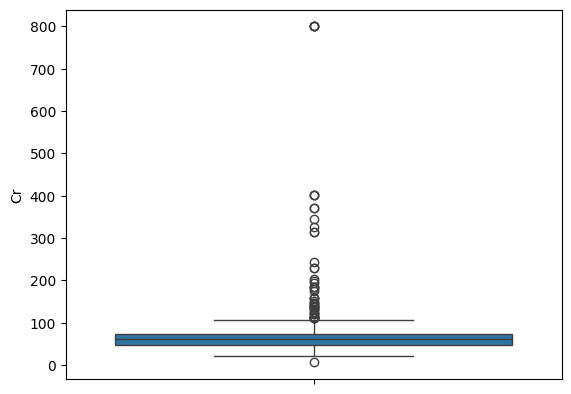

In [ ]:
#Checking for outliers in the dataset
sbn.boxplot(df1["Cr"])

In [ ]:
#Choose the maximum quantile that fill in the outlier
max_quant=df1["Cr"].quantile(0.995)
max_quant

401.0

In [ ]:
df1[df1["Cr" ]> max_quant]

,ID,No_of_Patients,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
273,1,34325,M,58.0,20.8,800.0,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
283,266,24060,M,58.0,20.8,800.0,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
846,1,34325,M,56.0,20.8,800.0,9.0,4.6,2.0,1.2,2.5,0.9,35.0,Y
860,19,51623,M,60.0,20.8,800.0,9.0,2.3,1.1,0.9,0.9,0.5,33.0,Y


In [ ]:
#Assigning new data to a new data frame
df2=df1[df1["Cr"]<max_quant]
df2

,ID,No_of_Patients,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.900000,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.900000,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.900000,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.900000,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.900000,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,188,454316,F,75.0,10.3,113.0,8.600000,4.2,1.6,0.9,2.6,0.7,32.0,Y
1003,189,454316,M,58.0,4.0,55.0,7.900000,4.9,2.0,1.2,1.4,1.1,35.0,Y
1005,192,454316,M,55.0,4.8,88.0,8.284155,5.7,4.0,0.9,3.3,1.8,30.0,Y
1007,194,454316,F,57.0,4.1,70.0,9.300000,5.3,3.3,1.0,1.4,1.3,29.0,Y


<Axes: ylabel='Cr'>

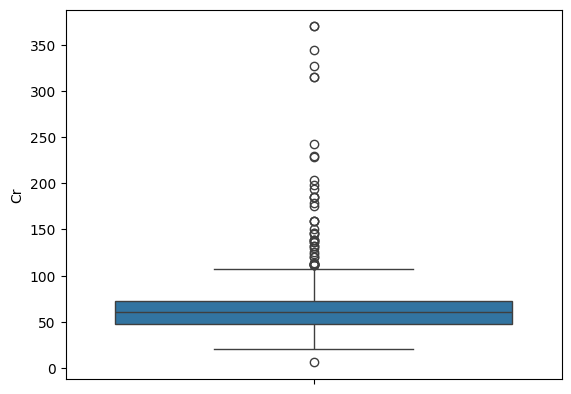

In [ ]:
sbn.boxplot(df2["Cr"])


<Axes: ylabel='HbA1c'>

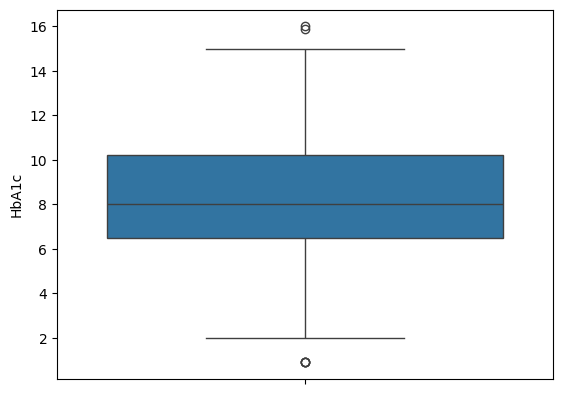

In [ ]:
#Checking for outliers in the dataset at column "HbA1c"
sbn.boxplot(df2["HbA1c"])

In [ ]:
#Checking for duplicated Values
df2.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1002     True
1003     True
1005    False
1007    False
1008     True
Length: 990, dtype: bool

In [ ]:
df3=df2.drop_duplicates()
df3

,ID,No_of_Patients,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.900000,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.900000,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.900000,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.900000,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.900000,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,669,87654,M,30.0,7.1,81.0,6.700000,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38.0,5.8,59.0,6.700000,5.3,2.0,1.6,2.9,14.0,40.5,Y
1000,185,454316,M,64.0,8.8,106.0,8.500000,5.9,2.1,1.2,4.0,1.2,32.0,Y
1005,192,454316,M,55.0,4.8,88.0,8.284155,5.7,4.0,0.9,3.3,1.8,30.0,Y


In [ ]:
#To configure the change
df3.duplicated().sum()


0

In [ ]:
#Saving the new dataset into csv file
df3.to_csv("/content/diabetes_unclean.csv")


In [ ]:
#Verifying the cleaning of the data set
df4=pd.read_csv("/content/diabetes_unclean.csv")
df4.duplicated().sum()

0